In [1]:
#importing the library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Reading The Data ##

In [234]:
data1 = pd.read_csv("C:\\Users\\KEM\\Downloads\\vgsales.csv")

In [235]:
data1.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Analysing the Dataset ##

In [236]:
#name of the columns from the data
data1.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [237]:
#shape of the data
data1.shape

(16598, 11)

In [238]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [239]:
data1.describe() #statistical description of the data

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [240]:
# checking for null value
data1.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


## Preprocessing ##

<function matplotlib.pyplot.show(close=None, block=None)>

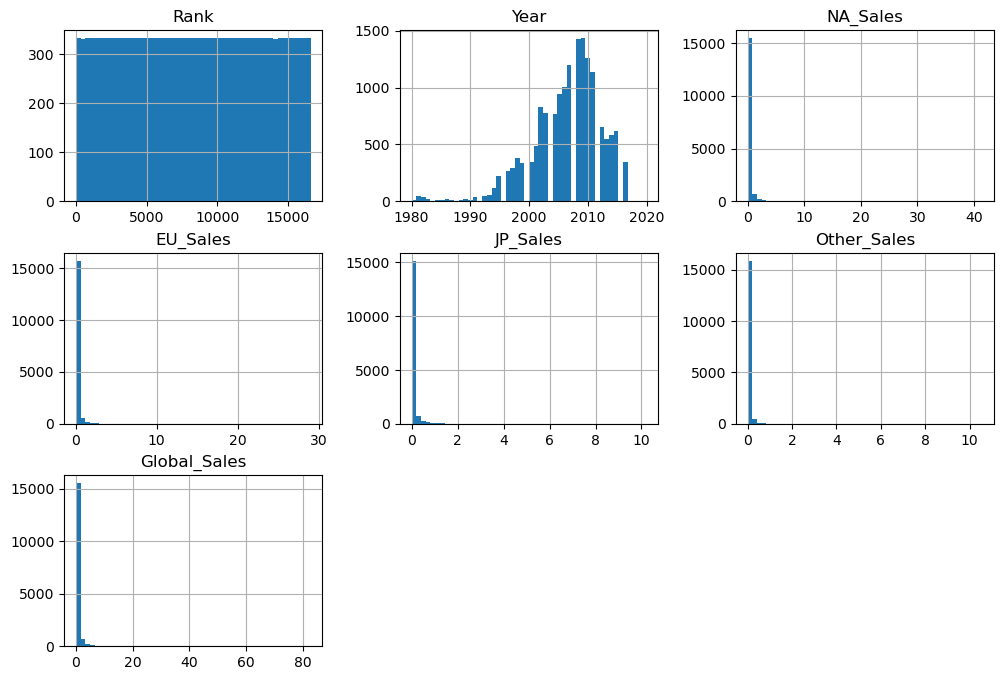

In [241]:
data1.hist(bins=50,figsize=(12,8))
plt.show

In [242]:
#looking from the graphs, all the sales are almost similar in all the above countries so we can consider only global sales as
#the target
## Dropping the columns we don't need 


In [243]:


# seeing if there is some null value in our final dataset
data1.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [244]:
#as we have enough rows to train and test the data we will just drop the rows with null enteries in publisher
data2 = data1.dropna(axis=0)
data2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [245]:
#checking again for the null values
data2.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Plotting To understand the data ##

Text(0.5, 1.0, 'Most Popular Genre')

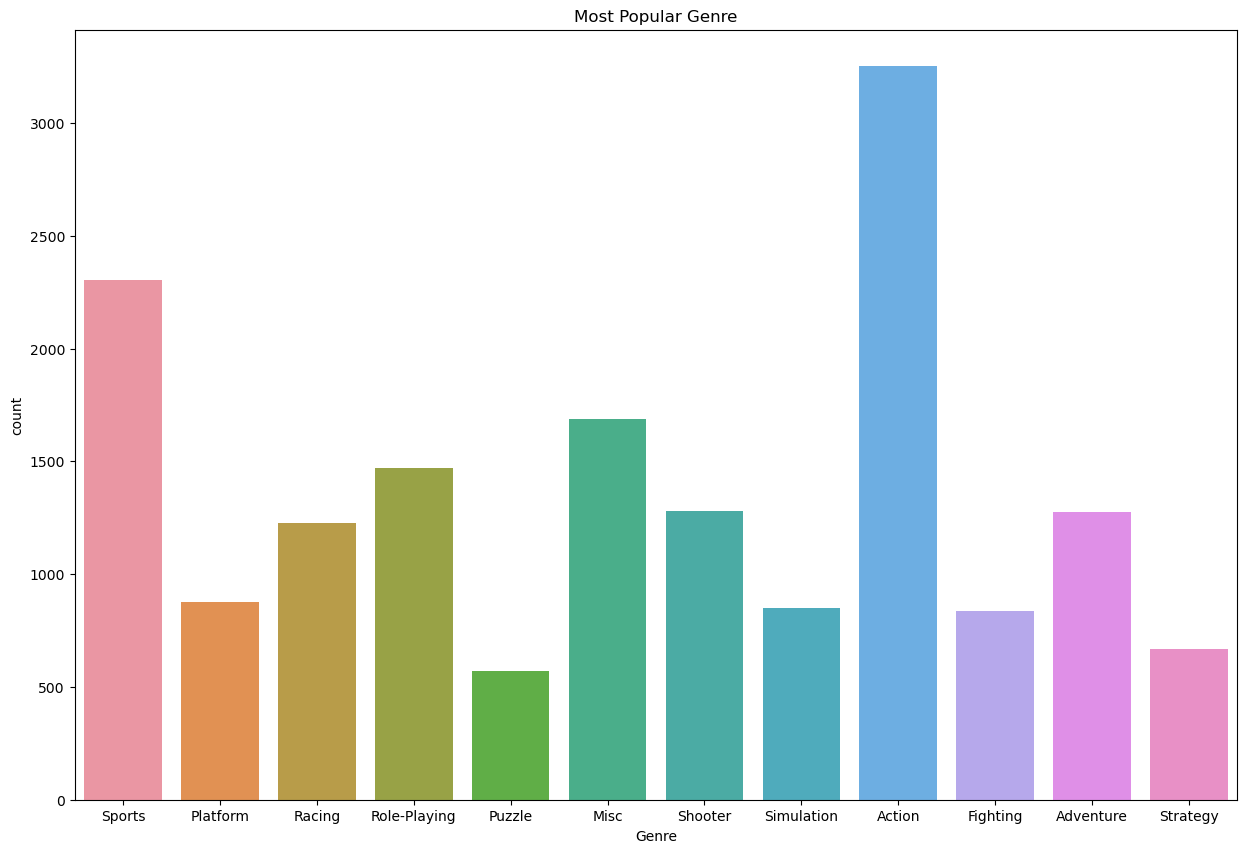

In [246]:
#Finding out the most popular genre
fig, plot1 = plt.subplots(figsize=(15, 10))
sns.countplot(x ='Genre', data =data2,ax=plot1).set_title("Most Popular Genre")

In [247]:
data2.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Text(0.5, 1.0, 'platforms vs the number of games released by them')

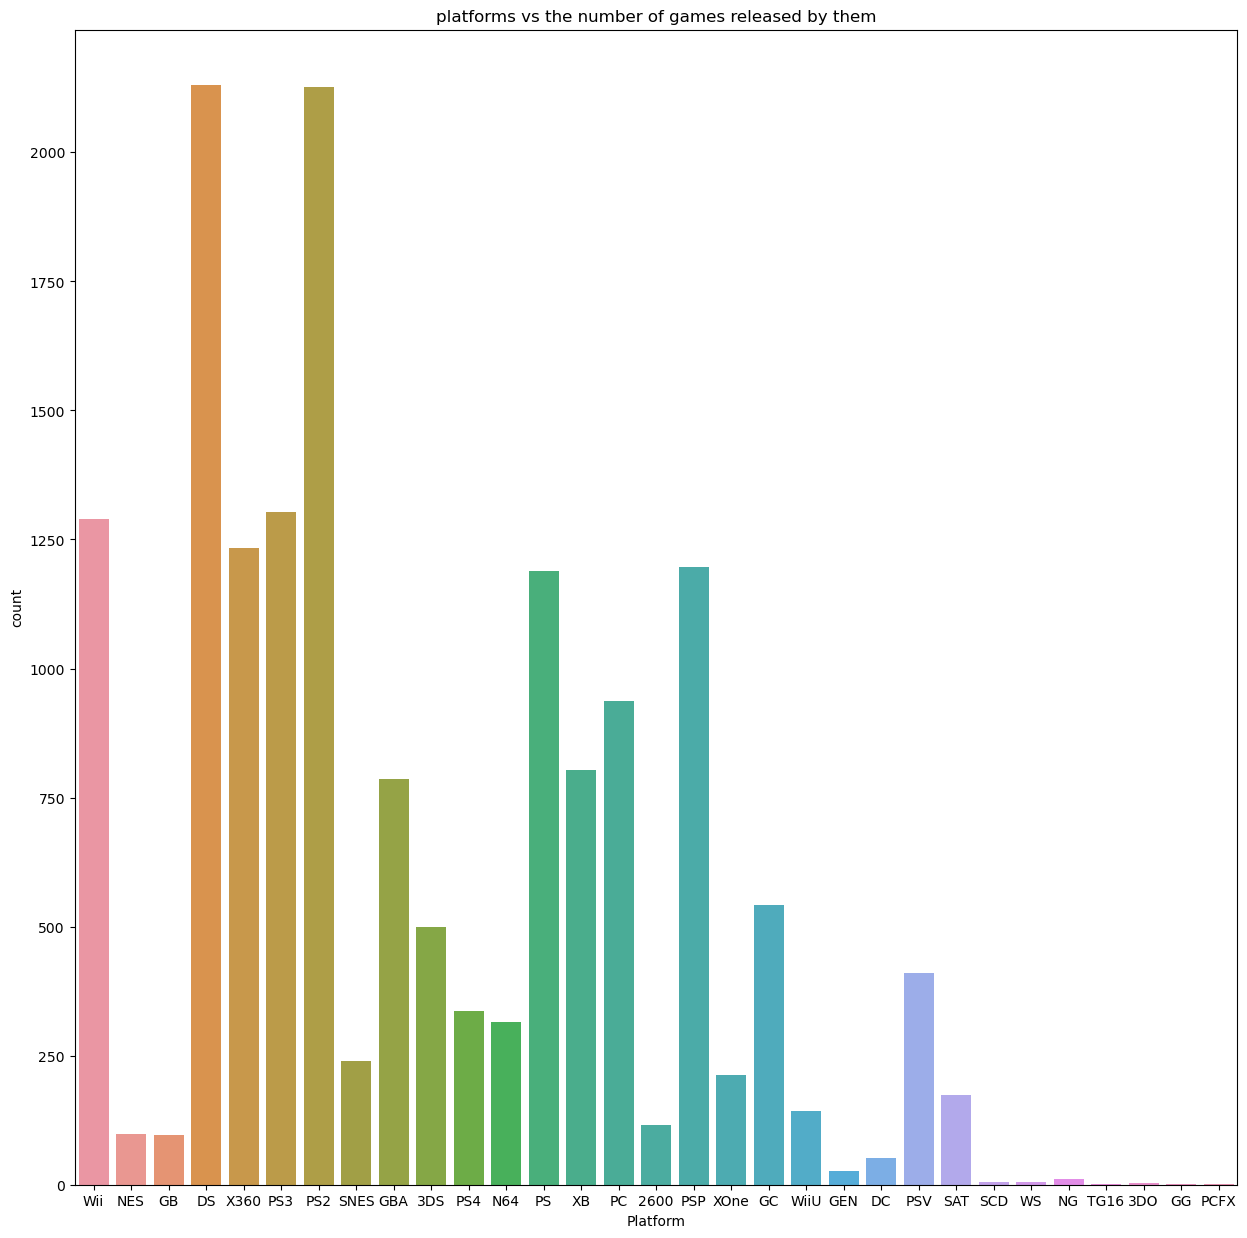

In [248]:
# which platform releases most games
fig,plot2=plt.subplots(figsize=(15, 15))
sns.countplot(x ='Platform', data =data2,ax=plot2).set_title("platforms vs the number of games released by them")

[Text(0.5, 1.0, 'Genre with highest global sales')]

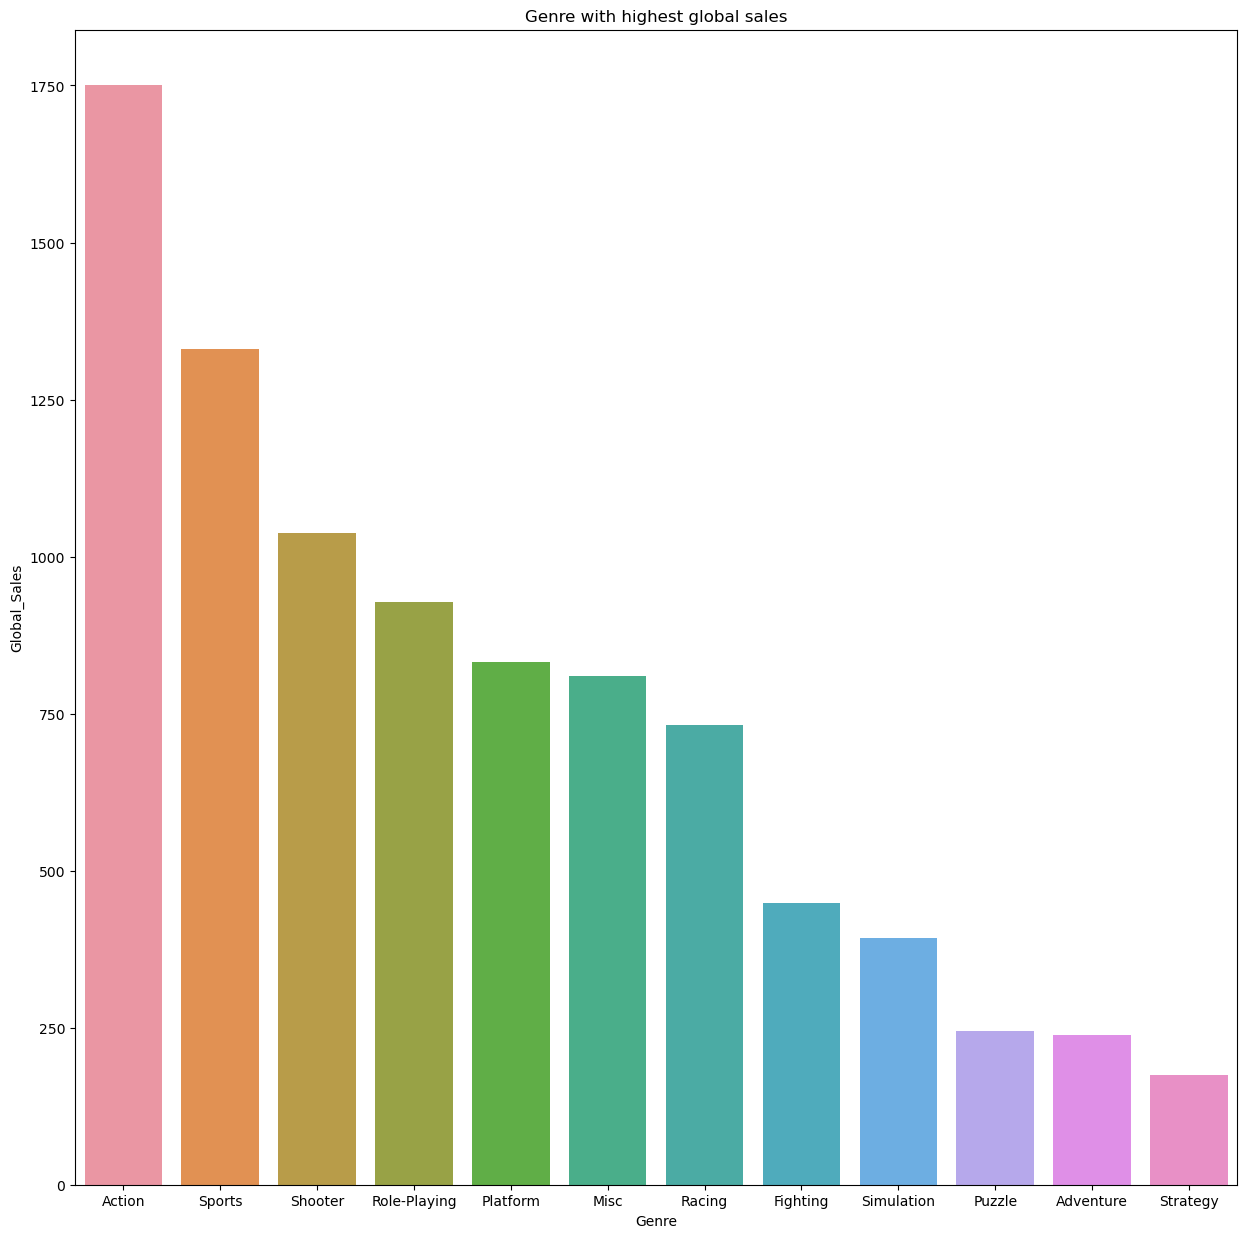

In [208]:
#Finding out the genre with the highest global sales

genrevsglobal=data1.groupby(["Genre"])["Global_Sales"].sum()
genrevsglobal=genrevsglobal.reset_index()
genrevsglobal=genrevsglobal.sort_values(by=["Global_Sales"],ascending=False)

plt.figure(figsize=(15, 15))
sns.barplot(x="Genre",y="Global_Sales",data=genrevsglobal).set(title=("Genre with highest global sales"))

In [ ]:
fig, plot1 = plt.subplots(figsize=(15, 10))
sns.countplot(x ='Genre', data =data1,ax=plot1).set_title("Most Popular Genre")

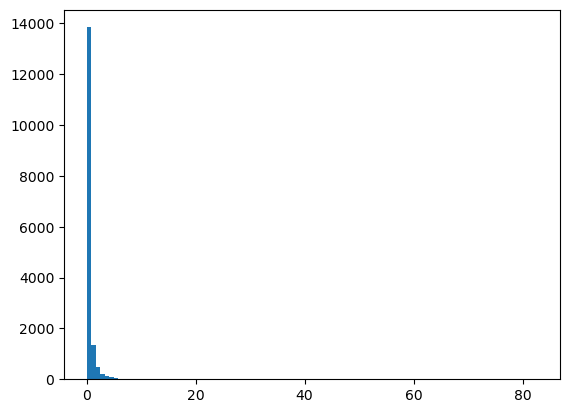

In [249]:
plt.hist(data2.Global_Sales,bins=100)
plt.show()

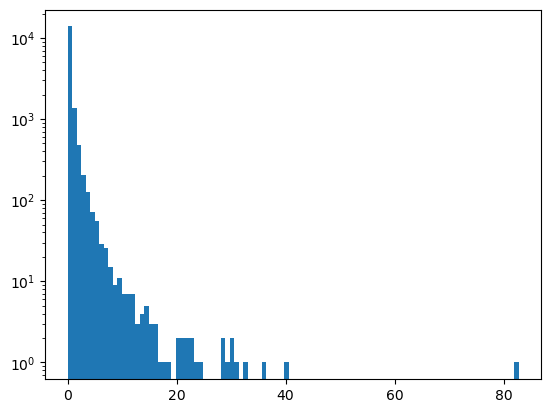

In [250]:
plt.hist(data2.Global_Sales,bins=100)
plt.yscale('log')
plt.show()

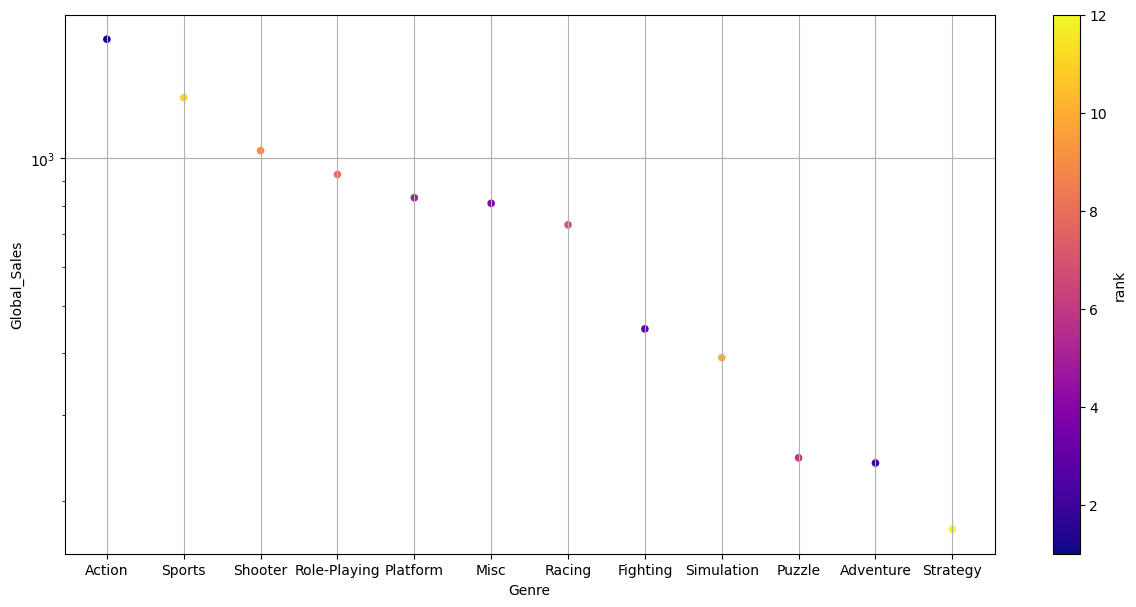

In [251]:
#global sales must be scaled inorder to make sense in the following plot
genrevsglobal['rank']=data2.Rank
genrevsglobal.plot(kind='scatter',x='Genre',y='Global_Sales',grid=True,c='rank',cmap='plasma',colorbar=True,legend=True,sharex=False,figsize=(15,7))
plt.yscale('log')
plt.show()

In [253]:
# Observations
#action has more global sales and also ranked high
#sports is ranked low but has high global sales
#adventure is ranked high but global sales are low

corr_matrix = data2.corr()
corr_matrix['Global_Sales']
# NA_Sales and EU_Sales are highly correlated

Rank           -0.426975
Year           -0.074647
NA_Sales        0.941269
EU_Sales        0.903264
JP_Sales        0.612774
Other_Sales     0.747964
Global_Sales    1.000000
Name: Global_Sales, dtype: float64

In [292]:


data3 = data2.drop(['JP_Sales','Other_Sales'],axis=1)

data3.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,31.37


In [264]:
rankglobal=data2[["Rank", "Global_Sales"]]
rankglobal=rankglobal.head(10)

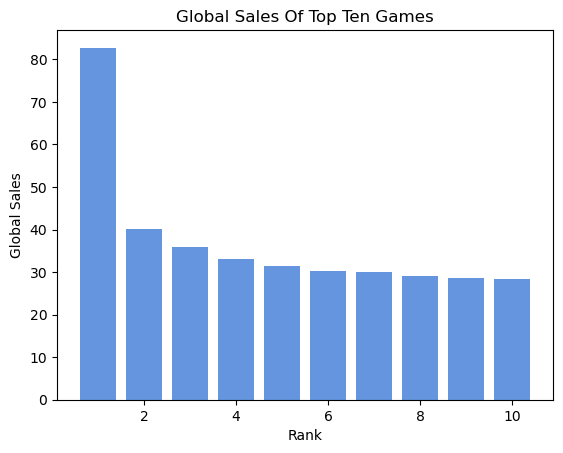

In [265]:
#Global Sales Of Top Ten Games 
plt.bar(rankglobal["Rank"],rankglobal["Global_Sales"],color="#6495DE")
plt.xlabel("Rank")
plt.ylabel("Global Sales")
plt.title("Global Sales Of Top Ten Games")
plt.show()

## Outlier Treatment ##

In [274]:
#The descriptive statistics of the output variable
data3['Global_Sales'].describe()

count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x260e3964be0>,
 'caps': [<matplotlib.lines.Line2D at 0x260e3965120>,
 'boxes': [<matplotlib.lines.Line2D at 0x260e3964940>],
 'medians': [<matplotlib.lines.Line2D at 0x260e3965660>],
 'fliers': [<matplotlib.lines.Line2D at 0x260e3965900>],
 'means': []}

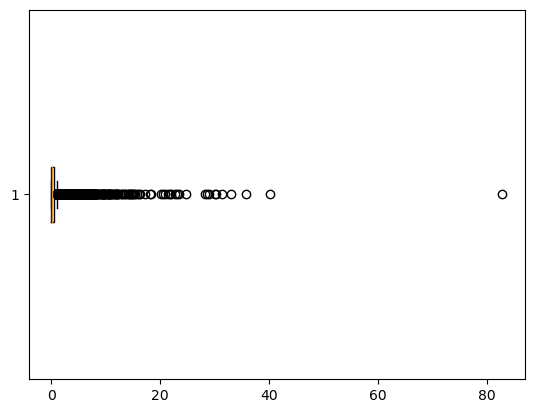

In [291]:
#Plotting boxplot of Global_Sales
plt.boxplot(data3['Global_Sales'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x260e58cb100>,
 'caps': [<matplotlib.lines.Line2D at 0x260dfb402e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x260e58cae60>],
 'medians': [<matplotlib.lines.Line2D at 0x260e4fd3130>],
 'fliers': [<matplotlib.lines.Line2D at 0x260e4fd27a0>],
 'means': []}

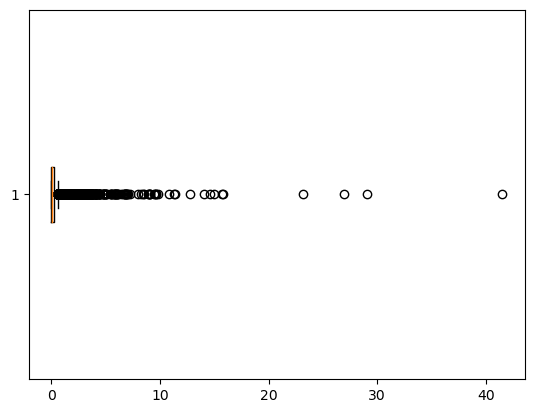

In [275]:
plt.boxplot(data3['NA_Sales'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x260e1456fe0>,
 'caps': [<matplotlib.lines.Line2D at 0x260e14567d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x260e0f65150>],
 'medians': [<matplotlib.lines.Line2D at 0x260e1456e60>],
 'fliers': [<matplotlib.lines.Line2D at 0x260e14565c0>],
 'means': []}

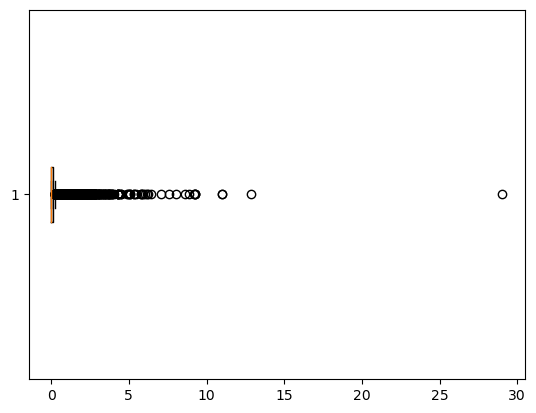

In [268]:
plt.boxplot(data2['EU_Sales'],vert=False)

In [270]:
#Calculating the upper and the lower limits

percentile25=data2['Global_Sales'].quantile(0.25)
percentile75=data2['Global_Sales'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit_gs=percentile75+1.5*iqr
lower_limit_gs=percentile25+1.5*iqr

In [155]:
percentile25=data2['NA_Sales'].quantile(0.25)
percentile75=data2['NA_Sales'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit_NA=percentile75+1.5*iqr
lower_limit_NA=percentile25+1.5*iqr

In [156]:
Percentile25=data1['EU_Sales'].quantile(0.25)
percentile75=data1['EU_Sales'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit_EU=percentile75+1.5*iqr
lower_limit_EU=percentile25+1.5*iqr

In [300]:
data3[data3['Global_Sales']>upper_limit_gs] #data with global sales greater than the upper limit

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,31.37
...,...,...,...,...,...,...,...,...,...
1842,1844,Need for Speed: ProStreet,Wii,2007.0,Racing,Electronic Arts,0.54,0.46,1.11
1843,1845,Pikmin 3,WiiU,2013.0,Strategy,Nintendo,0.45,0.31,1.11
1844,1846,Legend of Mana,PS,1999.0,Role-Playing,SquareSoft,0.18,0.13,1.11
1845,1847,Lumines: Puzzle Fusion,PSP,2004.0,Puzzle,Ubisoft,0.52,0.35,1.11


In [301]:
data3[data3['Global_Sales']<lower_limit_gs] #data with global sales lower than the lower limit

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
2970,2972,Baldur's Gate: Dark Alliance II,PS2,2004.0,Role-Playing,Interplay,0.34,0.26,0.68
2971,2973,Shark Tale,GBA,2004.0,Action,Activision,0.49,0.18,0.68
2972,2974,Plants vs. Zombies: Garden Warfare,XOne,2014.0,Shooter,Electronic Arts,0.39,0.23,0.68
2973,2975,Kirby's Dream Collection: Special Edition,Wii,2012.0,Action,Nintendo,0.34,0.00,0.68
2974,2976,Bakugan: Battle Brawlers,Wii,2009.0,Action,Activision,0.60,0.03,0.68
...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.01


In [315]:
#data without outliers

new_data1=data3[data3['Global_Sales'].between(lower_limit_gs,upper_limit_gs)]
new_data1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
1847,1849,Guitar Hero 5,PS3,2009.0,Misc,Activision,0.53,0.40,1.10
1848,1850,Megamania,2600,1981.0,Shooter,Activision,1.03,0.06,1.10
1849,1851,Medal of Honor: Airborne,X360,2007.0,Shooter,Electronic Arts,0.45,0.53,1.10
1850,1852,The Legend of Zelda: Tri Force Heroes,3DS,2015.0,Action,Nintendo,0.52,0.33,1.10
1851,1853,Jungle Hunt,2600,1982.0,Platform,Atari,1.03,0.06,1.10
...,...,...,...,...,...,...,...,...,...
2965,2967,Nintendo Presents: New Style Boutique 2 - Fash...,3DS,2015.0,Misc,Nintendo,0.01,0.61,0.69
2966,2968,MX vs. ATV Untamed,X360,2007.0,Racing,THQ,0.55,0.08,0.69
2967,2969,The Last Remnant,X360,2008.0,Role-Playing,Square Enix,0.25,0.20,0.69
2968,2970,Frozen: Olaf's Quest,DS,2013.0,Platform,Disney Interactive Studios,0.28,0.35,0.69


In [311]:
new_data1=new_data1[new_data1['NA_Sales'].between(lower_limit_NA,upper_limit_NA)]
new_data1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
595,596,Monster Hunter Freedom 2,PSP,2007.0,Role-Playing,Capcom,0.37,0.27,2.58
1076,1078,Yoshi's Cookie,GB,1992.0,Puzzle,Nintendo,0.59,0.24,1.68
1401,1403,Paper Mario,N64,2000.0,Role-Playing,Nintendo,0.58,0.18,1.38
1481,1483,Pokemon Ranger: Guardian Signs,DS,2010.0,Role-Playing,Nintendo,0.51,0.17,1.33
1529,1531,Resident Evil Zero,GC,2002.0,Action,Capcom,0.54,0.27,1.29
...,...,...,...,...,...,...,...,...,...
3259,3261,Beetle Adventure Racing!,N64,1999.0,Racing,Electronic Arts,0.40,0.20,0.62
3291,3293,Disney Sing It: Family Hits,Wii,2010.0,Misc,Disney Interactive Studios,0.39,0.18,0.61
3308,3310,Half-Life 2,XB,2005.0,Shooter,Electronic Arts,0.37,0.21,0.61
3344,3346,Phineas and Ferb: Across the 2nd Dimension,Wii,2011.0,Action,Disney Interactive Studios,0.36,0.19,0.60


In [322]:
new_data1=new_data1[new_data1['EU_Sales'].between(lower_limit_EU,upper_limit_EU)]
new_data1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
1866,1868,Tales of Symphonia,GC,2003.0,Role-Playing,Nintendo,0.54,0.21,1.10
1869,1871,Lightning Returns: Final Fantasy XIII,PS3,2013.0,Role-Playing,Square Enix,0.31,0.22,1.10
1874,1876,Skate 2,X360,2009.0,Sports,Electronic Arts,0.82,0.17,1.09
1879,1881,Namco Museum Battle Collection,PSP,2005.0,Misc,Sony Computer Entertainment,0.75,0.18,1.09
1892,1894,Sonic Free Riders,X360,2010.0,Racing,Sega,0.74,0.26,1.09
...,...,...,...,...,...,...,...,...,...
2948,2950,Moto Racer 2,PS,1997.0,Racing,Electronic Arts,0.39,0.26,0.69
2954,2956,Mario Pinball Land,GBA,2004.0,Misc,Nintendo,0.50,0.18,0.69
2958,2960,NFL Xtreme,PS,1998.0,Sports,Sony Computer Entertainment,0.38,0.26,0.69
2960,2962,One Piece: Pirate Warriors 2,PS3,2013.0,Action,Namco Bandai Games,0.00,0.20,0.69


{'whiskers': [<matplotlib.lines.Line2D at 0x260e54f4e50>,
 'caps': [<matplotlib.lines.Line2D at 0x260e54f53c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x260e54f4bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x260e54d61a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x260dfba0790>],
 'means': []}

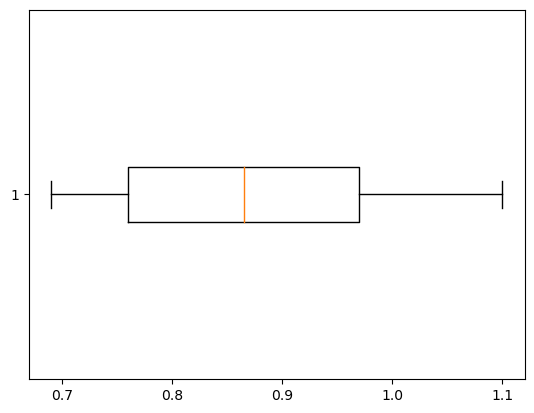

In [316]:
#boxplot of the new data global sales 
plt.boxplot(new_data1['Global_Sales'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x260dfe372b0>,
 'caps': [<matplotlib.lines.Line2D at 0x260dfdf1780>,
 'boxes': [<matplotlib.lines.Line2D at 0x260dfe37130>],
 'medians': [<matplotlib.lines.Line2D at 0x260dfdf17e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x260dfdf1f60>],
 'means': []}

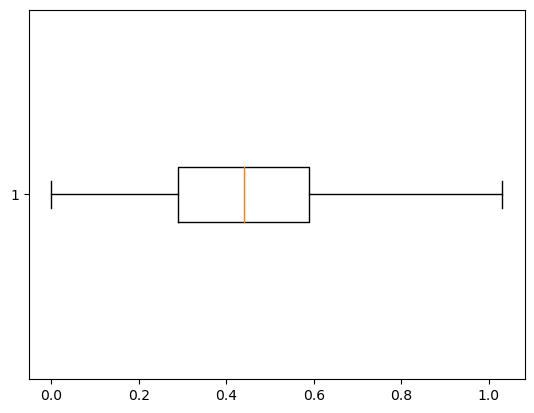

In [321]:
plt.boxplot(new_data1['NA_Sales'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x260dff89000>,
 'caps': [<matplotlib.lines.Line2D at 0x260dff8a740>,
 'boxes': [<matplotlib.lines.Line2D at 0x260dff8add0>],
 'medians': [<matplotlib.lines.Line2D at 0x260dff893c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x260dff89810>],
 'means': []}

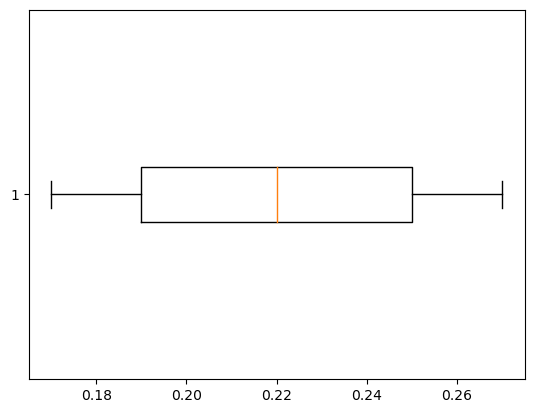

In [323]:
plt.boxplot(new_data1['EU_Sales'],vert=False)

In [324]:
new_data1.describe()

,Rank,Year,NA_Sales,EU_Sales,Global_Sales
count,230.000000,230.000000,230.000000,230.000000,230.000000
mean,2521.813043,2006.408696,0.482348,0.222000,0.831261
std,302.906683,5.067915,0.146754,0.033349,0.108803
min,1868.000000,1996.000000,0.000000,0.170000,0.690000
25%,2273.750000,2003.000000,0.380000,0.190000,0.740000
50%,2529.000000,2007.500000,0.470000,0.220000,0.815000
75%,2779.250000,2010.000000,0.600000,0.250000,0.917500
max,2969.000000,2016.000000,0.820000,0.270000,1.100000


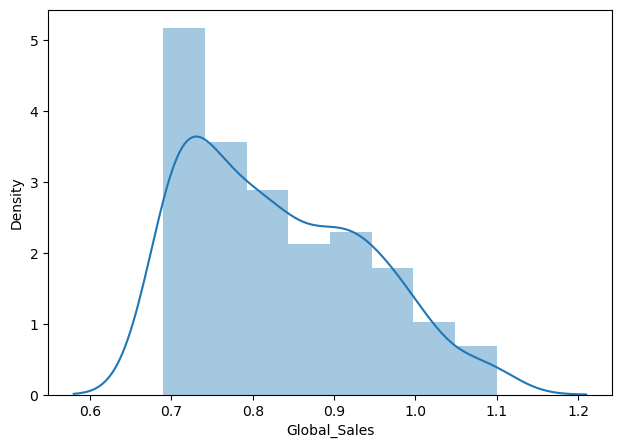

In [328]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_data1['Global_Sales'])

plt.show()

In [329]:
#Highest and lowest values of the global sales in new data
upper_limit = new_data1['Global_Sales'].mean() + 3*new_data1['Global_Sales'].std()#Appling capping
lower_limit = new_data1['Global_Sales'].mean() - 3*new_data1['Global_Sales'].std()

print("Highest allowed",upper_limit) 
print("Lowest allowed",lower_limit)

Highest allowed 1.1576705374856735
Lowest allowed 0.504851201644761


In [337]:
df= new_data1[(new_data1['Global_Sales'] > 0.506211875265101) | (new_data1['Global_Sales'] <1.240704345768767)]


## Winzorisation ##

In [333]:
new_data1['Global_Sales'] = np.where(
    new_data1['Global_Sales'] > upper_limit_gs,
    upper_limit_gs,
    np.where(
        new_data1['Global_Sales'] < lower_limit_gs,
        lower_limit_gs,
        new_data1['Global_Sales']
    )
)

In [334]:
new_data1['NA_Sales'] = np.where(
    new_data1['NA_Sales'] > upper_limit_NA,
    upper_limit_NA,
    np.where(
        new_data1['NA_Sales'] < lower_limit_NA,
        lower_limit_NA,
        new_data1['NA_Sales']
    )
)

In [335]:
new_data1['EU_Sales'] = np.where(
    new_data1['EU_Sales'] > upper_limit_EU,
    upper_limit_NA,
    np.where(
        new_data1['EU_Sales'] < lower_limit_EU,
        lower_limit_EU,
        new_data1['EU_Sales']
    )
)

In [336]:
new_data1.describe()

,Rank,Year,NA_Sales,EU_Sales,Global_Sales
count,230.000000,230.000000,230.000000,230.000000,230.000000
mean,2521.813043,2006.408696,0.476130,0.222000,0.831261
std,302.906683,5.067915,0.094353,0.033349,0.108803
min,1868.000000,1996.000000,0.360000,0.170000,0.690000
25%,2273.750000,2003.000000,0.380000,0.190000,0.740000
50%,2529.000000,2007.500000,0.470000,0.220000,0.815000
75%,2779.250000,2010.000000,0.600000,0.250000,0.917500
max,2969.000000,2016.000000,0.600000,0.270000,1.100000


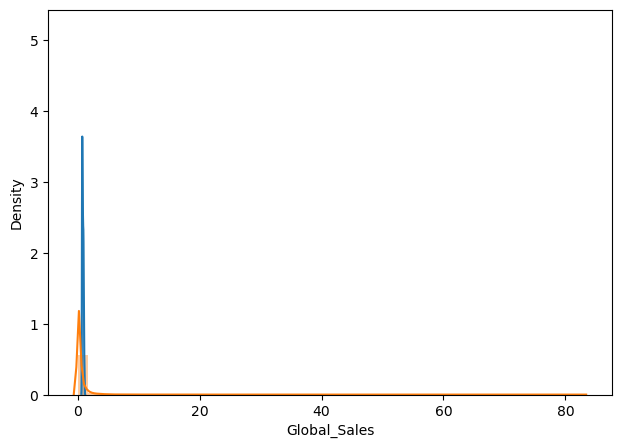

In [338]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_data1['Global_Sales'])
sns.distplot(data['Global_Sales'])
plt.show()
#no change in plot 

## Encoding ##

In [33]:
## Taking a look at the unique values in the column
new_data['Platform'].unique()

array(['PS3', '2600', 'X360', '3DS', 'PS', 'DS', 'GB', 'NES', 'N64',
       'Wii', 'PS2', 'GC', 'PSP', 'GBA', 'DC', 'XB', 'PC', 'WiiU', 'SAT',
       'PS4', 'SNES', 'XOne', 'PSV'], dtype=object)

In [340]:
new_data1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
1866,1868,Tales of Symphonia,GC,2003.0,Role-Playing,Nintendo,0.54,0.21,1.10
1869,1871,Lightning Returns: Final Fantasy XIII,PS3,2013.0,Role-Playing,Square Enix,0.36,0.22,1.10
1874,1876,Skate 2,X360,2009.0,Sports,Electronic Arts,0.60,0.17,1.09
1879,1881,Namco Museum Battle Collection,PSP,2005.0,Misc,Sony Computer Entertainment,0.60,0.18,1.09
1892,1894,Sonic Free Riders,X360,2010.0,Racing,Sega,0.60,0.26,1.09


In [341]:
new_data1['Publisher'].unique()

array(['Nintendo', 'Square Enix', 'Electronic Arts',
       'Sony Computer Entertainment', 'Sega', 'Capcom', 'Hudson Soft',
       'Activision', 'Disney Interactive Studios', 'Namco Bandai Games',
       'Tecmo Koei', 'THQ', 'Ubisoft', 'Microsoft Game Studios',
       'Vivendi Games', 'LucasArts', 'GT Interactive', 'Koch Media',
       'Konami Digital Entertainment', 'Unknown',
       'Marvelous Entertainment', 'Genki', 'Hasbro Interactive', 'Atari',
       'Warner Bros. Interactive Entertainment', 'Crave Entertainment',
       'Virgin Interactive', 'Take-Two Interactive', 'Level 5',
       'Avanquest Software', 'Deep Silver', 'Touchstone',
       'Eidos Interactive', 'Jester Interactive', 'Acclaim Entertainment',
       'LEGO Media', 'SouthPeak Games', 'Majesco Entertainment',
       '505 Games', 'Illusion Softworks'], dtype=object)

In [342]:
new_data1['Genre'].unique()

array(['Role-Playing', 'Sports', 'Misc', 'Racing', 'Shooter', 'Fighting',
       'Puzzle', 'Simulation', 'Action', 'Platform', 'Strategy',
       'Adventure'], dtype=object)

In [343]:
new_data1['Publisher'].value_counts()

Electronic Arts                           30
Activision                                25
THQ                                       21
Nintendo                                  19
Capcom                                    12
Namco Bandai Games                        11
Ubisoft                                   10
Sega                                       9
Konami Digital Entertainment               9
Sony Computer Entertainment                8
Microsoft Game Studios                     8
Disney Interactive Studios                 7
Take-Two Interactive                       7
Square Enix                                7
Atari                                      6
Warner Bros. Interactive Entertainment     5
Virgin Interactive                         3
LucasArts                                  3
GT Interactive                             3
Koch Media                                 2
Hasbro Interactive                         2
Vivendi Games                              2
Tecmo Koei

In [344]:
counts= new_data1['Publisher'].value_counts()
new_data1['Publisher'] = new_data1['Publisher'].apply(lambda x:'Small Publisher' if counts[x]<50 else x) #taking all small publishers and combine them

In [345]:
onehot_columns = ['Platform', 'Genre', 'Publisher']

In [346]:
def onehot_encode(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column])
        data = pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data

In [347]:
new_data2 = onehot_encode(new_data1, onehot_columns)

In [380]:
new_data2.head()

,Rank,Name,Year,NA_Sales,EU_Sales,Global_Sales,3DS,DS,GB,GBA,...,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Small Publisher
1866,1868,Tales of Symphonia,2003.0,0.54,0.21,1.10,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1869,1871,Lightning Returns: Final Fantasy XIII,2013.0,0.36,0.22,1.10,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1874,1876,Skate 2,2009.0,0.60,0.17,1.09,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1879,1881,Namco Museum Battle Collection,2005.0,0.60,0.18,1.09,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1892,1894,Sonic Free Riders,2010.0,0.60,0.26,1.09,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [392]:
new_data2.isnull().sum()

Rank               0
Name               0
Year               0
NA_Sales           0
EU_Sales           0
Global_Sales       0
3DS                0
DS                 0
GB                 0
GBA                0
GC                 0
N64                0
PS                 0
PS2                0
PS3                0
PS4                0
PSP                0
PSV                0
Wii                0
WiiU               0
X360               0
XB                 0
XOne               0
Action             0
Adventure          0
Fighting           0
Misc               0
Platform           0
Puzzle             0
Racing             0
Role-Playing       0
Shooter            0
Simulation         0
Sports             0
Strategy           0
Small Publisher    0
dtype: int64

## Scaling ##

In [393]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [423]:
y = new_data2['Global_Sales'] #splitting y (output variable) from the data
x = new_data2.drop(['Global_Sales','Name'], axis=1) #splitting our data into x and y
x

,Rank,Year,NA_Sales,EU_Sales,3DS,DS,GB,GBA,GC,N64,...,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Small Publisher
1866,1868,2003.0,0.54,0.21,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1869,1871,2013.0,0.36,0.22,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1874,1876,2009.0,0.60,0.17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1879,1881,2005.0,0.60,0.18,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1892,1894,2010.0,0.60,0.26,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,2950,1997.0,0.39,0.26,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2954,2956,2004.0,0.50,0.18,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2958,2960,1998.0,0.38,0.26,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2960,2962,2013.0,0.36,0.20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [424]:
Y = norm_func(y)
Y.describe()

count    230.000000
mean       0.344539
std        0.265374
min        0.000000
25%        0.121951
50%        0.304878
75%        0.554878
max        1.000000
Name: Global_Sales, dtype: float64

In [425]:
X= norm_func(x)
X.describe()

,Rank,Year,NA_Sales,EU_Sales,3DS,DS,GB,GBA,GC,N64,...,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Small Publisher
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,...,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,0.0
mean,0.593836,0.520435,0.483877,0.520000,0.030435,0.047826,0.004348,0.100000,0.060870,0.039130,...,0.100000,0.060870,0.017391,0.065217,0.108696,0.104348,0.034783,0.095652,0.034783,NaN
std,0.275120,0.253396,0.393136,0.333488,0.172155,0.213864,0.065938,0.300654,0.239612,0.194328,...,0.300654,0.239612,0.131009,0.247448,0.311936,0.306378,0.183628,0.294755,0.183628,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.368529,0.350000,0.083333,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.600363,0.575000,0.458333,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.827657,0.700000,1.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [426]:
X['Small Publisher'] = X['Small Publisher'].fillna(0)
X.isnull().sum()


Rank               0
Year               0
NA_Sales           0
EU_Sales           0
3DS                0
DS                 0
GB                 0
GBA                0
GC                 0
N64                0
PS                 0
PS2                0
PS3                0
PS4                0
PSP                0
PSV                0
Wii                0
WiiU               0
X360               0
XB                 0
XOne               0
Action             0
Adventure          0
Fighting           0
Misc               0
Platform           0
Puzzle             0
Racing             0
Role-Playing       0
Shooter            0
Simulation         0
Sports             0
Strategy           0
Small Publisher    0
dtype: int64

## Model Building

In [430]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [431]:
from sklearn.linear_model import LinearRegression
lnr_clf = LinearRegression()
lnr_clf.fit(X_train,y_train)
lnr_clf.score(X_test,y_test)

0.9882822834775676

In [432]:
# using K Fold cross validation to measure the accuracy of the LinearRegression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=52)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.9842264 , 0.98542143, 0.99146871, 0.98151628, 0.98809568])

In [435]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.989772,{'fit_intercept': True}
1,lasso,-0.015525,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.998809,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
